In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from GACPD.GACPD import  GACPD

In [3]:
token_list = []
token_file = 'tokens.txt'

if not os.path.exists("reports"):
    os.mkdir("reports")

if not os.path.exists("src"):
    os.mkdir("src")

if not os.path.exists("cmp"):
    os.mkdir("cmp")

with open(token_file, 'r') as f:
    for line in f.readlines():
        token_list.append(line.strip('\n'))

In [4]:
data = ('1', 'apache/kafka', 'linkedin/kafka', token_list, '', '')

In [5]:
example = GACPD(data)

In [6]:
example.get_dates()

The divergence_date of the repository linkedin/kafka is 2022-06-02T17:08:43Z and the cut_off_date is 2025-04-15T18:26:45Z.
The variant2 is ==>
	 Ahead by 470 patches
	 Behind by 6332 patches
Select an interval within the period [2022-06-02T17:08:43Z, 2025-04-15T18:26:45Z] to limit the patches being checked.


In [7]:
prs_source = example.extractPatches('2022-06-02T17:08:43Z', '2022-12-18T17:08:43Z')

Extracting patches between 2022-06-02T17:08:43Z and 2022-12-18T17:08:43Z...
https://api.github.com/repos/apache/kafka/pulls?page=1&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=2&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=3&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=4&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=5&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=6&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=7&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page=8&per_page=100&state=closed&sort=created&direction=desc
https://api.github.com/repos/apache/kafka/pulls?page

In [8]:
example.dfPatches()

,Patch number,Patch title
0,13008,minor: fix compiler errors in `remoteindex*` r...
1,12987,minor- fix fetchfromfollowerintegrationtest.te...
2,12939,minor- avoid unnecessarily requesting node for...
3,12938,minor: fix compilation issue in filestreamsour...
4,12935,kafka-14432: rocksdbstore relies on finalizers...
...,...,...
143,12252,minor: fix docs in quickstart.html
144,12251,minor: fix streams tutorial
145,12250,kafka-13935 fix static usages of ibp in kraft ...
146,12244,hotfix: only try to clear discover-coordinator...


Fetching commit information and files from patches...
'patch'
This should only happen if there are no files changed in a commit
'patch'
This should only happen if there are no files changed in a commit
'patch'
This should only happen if there are no files changed in a commit
Fetch Runtime:  1531.9093487262726

Starting classification for apache/kafka, - , linkedin/kafka...

Bar plot of the patch classifications for apache/kafka -> linkedin/kafka


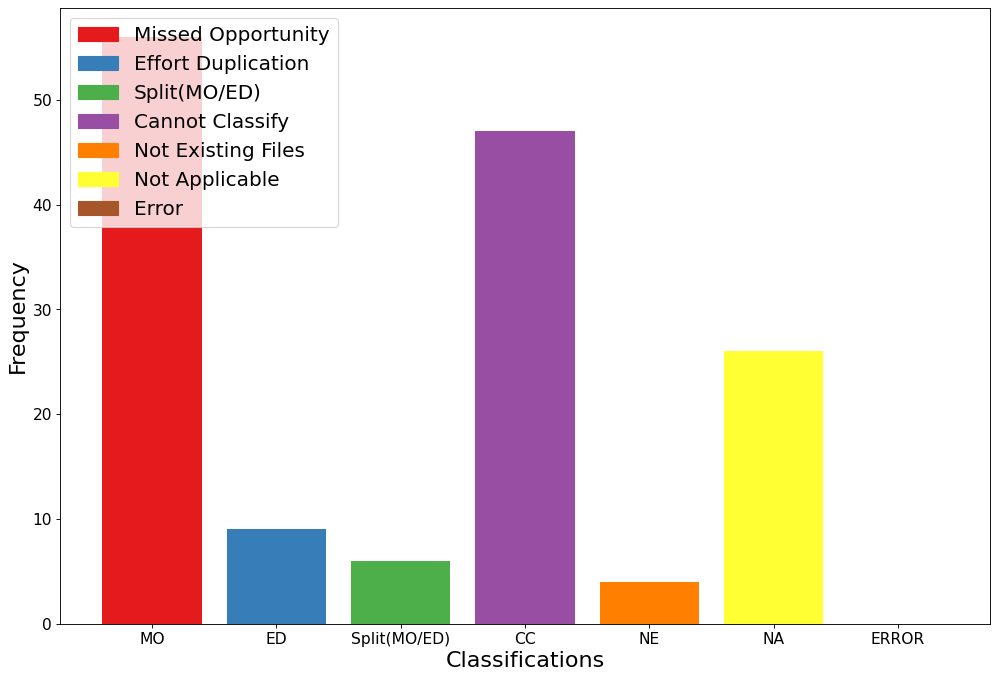

In [9]:
example.runClassification(prs_source)

In [10]:
example.dfPatchClass().to_csv('results-50-40-30-new.csv')
example.dfFileClass()
example.dfFileClass().to_csv('GACPD-50-40-30-new.csv')

In [11]:
for i in range(0, len(example.cycles)):
    print(example.cycles[i])

['streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/KeyValueSegmentIteratorTest.java', 'streams/src/test/java/org/apache/kafka/streams/state/internals/SegmentIteratorTest.java']
['core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManagerImpl.scala', 'core/src/main/scala/kafka/server/BrokerToControllerChannelManager.scala']
